In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [40]:
#Read the csv file
df = pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


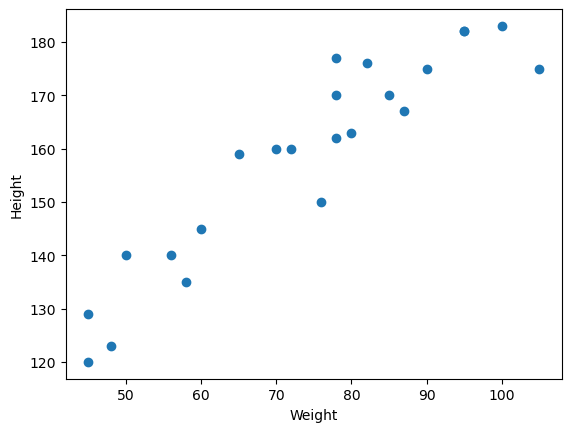

In [41]:
plt.scatter(df['Weight'], df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")
plt.show()


In [42]:
#dividing dataset into independent and dependent features
X = df[['Weight']] #independent feature
Y = df['Height'] #dependent feature

In [43]:
from sklearn.model_selection import train_test_split


In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [45]:
X.shape

(23, 1)

In [46]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((18, 1), (5, 1), (18,), (5,))

In [47]:
#standardize the dataset Train independent data
from sklearn.preprocessing import StandardScaler

In [48]:
scaler = StandardScaler()

In [49]:
X_train.head()

,Weight
12,105
1,58
13,100
5,78
2,48


In [50]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

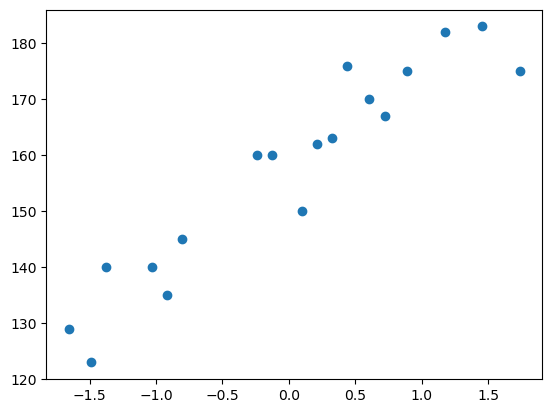

In [51]:
plt.scatter(X_train, Y_train)
plt.show()

In [52]:
#Train the Simple Linear Regression Model
from sklearn.linear_model import LinearRegression

In [53]:
regressor = LinearRegression()

In [54]:
regressor.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [55]:
#slope/coefficient of weight
print(regressor.coef_)

#intercept
print(regressor.intercept_)

[17.03440872]
157.5


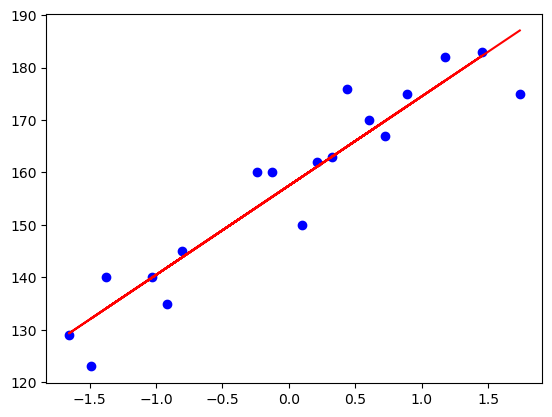

In [61]:
plt.scatter(X_train, Y_train, color='blue')
plt.plot(X_train, regressor.predict(X_train), 'r')
plt.show()

### prediction of train data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_train =157.5 + 17.03(X_train)
          
### prediction of test data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_test =157.5 + 17.03(X_test)

In [57]:
Y_pred_test = regressor.predict(X_test)

In [58]:
Y_pred_test, Y_test

(array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
        148.56507414]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

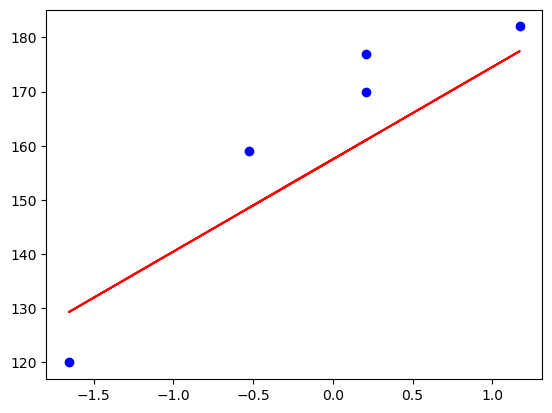

In [60]:
plt.scatter(X_test, Y_test, color='blue')
plt.plot(X_test, regressor.predict(X_test), 'r')
plt.show()

Performance Metrics

MSE, MAE, RMSE

R squared and adjusted R squared

In [62]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [63]:
mse=mean_squared_error(Y_test,Y_pred_test)
mae=mean_absolute_error(Y_test,Y_pred_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

109.77592599051664
9.822657814519232
10.477400726827081


## R square 
Formula

**R^2 = 1 - SSR/SST**


R^2	=	coefficient of determination
SSR	=	sum of squares of residuals
SST	=	total sum of squares

## Adjusted R Square

**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

R2: The R2 of the model
n: The number of observations
k: The number of predictor variables

In [65]:
from sklearn.metrics import r2_score
score=r2_score(Y_test,Y_pred_test)

In [67]:
score

0.776986986042344

In [69]:
#display adjusted R-squared
1 - (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.7026493147231252